In [13]:
import root_to_df as rt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Lectura de datos

In [14]:
path = 'tag_1_delphes_events.root'                                      # Archivo a leer
cv = rt.RootToPdf(path = path, tree_name="Delphes")                     # Lee el .ROOT
branch=["Muon.PT", "Muon.Phi", "Muon.Eta", "Muon.Charge", "Muon_size"]  # Busca la información en el archivo ROOT
data = cv.extract_df_branch(branch)                                     # Crea un dataframe con la informacion pedida en branch

data = data.rename(columns = {"muon_pt0" : "MPt1", "muon_phi0" : "MPhi1", "muon_eta0" : "MEta1", "muon_charge0" : "MCharge1",
"muon_pt1" : "MPt2", "muon_phi1" : "MPhi2", "muon_eta1" : "MEta2", "muon_charge1" : "MCharge2", "muon_size" : "MNum"}) # renombra las columnas

### Filtrado de los datos

In [15]:
                                                                    # Condiciones de filtrado:
data = data[data.MNum == 2]                                         # Numero de Muones igual a 2
data = data[(abs(data.MPt1) > 30) & (abs(data.MPt2) > 30)]        # Pt mayor o igual a 20
data = data[(abs(data.MEta1) < 2.4) & (abs(data.MEta2) < 2.4)]      # El valor absoluto de eta menor a 2.4 (Condicion de la construccion del CMS)

data = data[["MPt1", "MPt2", "MPhi1", "MPhi2", "MEta1", "MEta2"]]   # Almacena unicamente las valores que se usaran para calcular la masa invariante
data.to_csv("cleanData.csv")                                        # Guarda los datos en csv
data.head()

MPt1       MPt2     MPhi1     MPhi2     MEta1     MEta2
6   43.829723  38.050892  0.022131 -2.701288  0.341336  1.411251
8   47.088779  41.535351  2.329529 -0.914049 -1.851031 -1.472432
11  38.445377  33.541813 -1.445189  1.643696 -1.675741 -0.245955
12  47.125099  40.290833 -0.241289 -3.115630  0.730154 -0.037068
14  66.754341  58.210888 -2.874620  0.199720 -0.379960 -1.020644

### Masa invariante
La masa invariante se calcula con la siguiente ecuación
$ M = \sqrt{ 2Pt_1Pt_2 (cosh(\eta _1 - \eta _2) - cos(\phi _1 - \phi _2)) } $

In [16]:
#Calculo de la masa invariante
M = np.sqrt( 2*data.MPt1*data.MPt2 * ( np.cosh(data.MEta1 - data.MEta2) - np.cos(data.MPhi1 - data.MPhi2) ) )

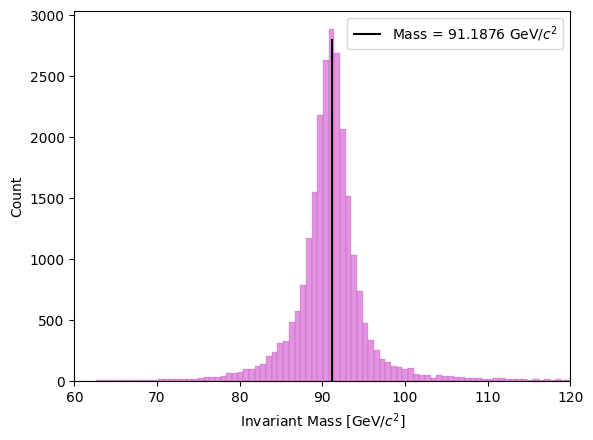

In [17]:
#Grafico del histograma
sns.histplot(M, color = 'orchid', edgecolor = 'darkmagenta', linewidth = 0.1, bins = 1000)
plt.xlabel('Invariant Mass [GeV/$c^2$]')
plt.vlines(x=91.1876, ymin=0, ymax=2800, color = 'black', label = 'Mass = 91.1876 GeV/$c^2$')
plt.xlim(60,120)
plt.legend()

In [18]:
#Descripción general de los datos: Media y desviación estándar
M.describe()[["mean", "std"]]

mean    91.660286
std      9.965788
dtype: float64

El valor promedio de la masa para el boson Z obtenida con los datos generados por montecarlo es de M = 91.6602 GeV, valor muy cercano al aceptado actualmente de M = 91.1876 GeV

In [19]:
pd.cut(M, bins = 1000).value_counts()

(90.747, 91.434]      2885
(91.434, 92.121]      2690
(90.06, 90.747]       2633
(89.373, 90.06]       2175
(92.121, 92.808]      2063
                      ... 
(359.36, 360.047]        0
(360.047, 360.734]       0
(360.734, 361.421]       0
(361.421, 362.108]       0
(381.344, 382.031]       0
Length: 1000, dtype: int64